In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 


In [5]:
df=pd.read_csv('../DataSets/Video Game sales (1).csv')

In [6]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [8]:
df.isnull()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False,False


In [12]:
Y=df.groupby('Name')['Global_Sales'].nlargest().reset_index()
Y.sort_values(by='Global_Sales',ascending=False)

,Name,level_1,Global_Sales
15724,Wii Sports,0,82.74
13194,Super Mario Bros.,1,40.24
7819,Mario Kart Wii,2,35.82
15726,Wii Sports Resort,3,33.00
10360,Pokemon Red/Pokemon Blue,4,31.37
...,...,...,...
14356,The Technomancer,16399,0.01
9316,Nakayoshi All-Stars: Mezase Gakuen Idol,16336,0.01
1247,Blackthorne,15987,0.01
4434,Festa!! Hyper Girls Party,16132,0.01


In [11]:
df.Global_Sales.sum()

8920.44

In [14]:
df.groupby('Platform')['Global_Sales'].nlargest()

Platform     
2600      89     7.81
          239    4.50
          258    4.31
          544    2.76
          607    2.53
                 ... 
XOne      101    7.30
          193    5.13
          197    5.08
          260    4.26
          287    4.09
Name: Global_Sales, Length: 142, dtype: float64

In [21]:
r=df.groupby('Platform')['Global_Sales'].sum().reset_index()
r.sort_values(by='Global_Sales',ascending=False)

,Platform,Global_Sales
16,PS2,1255.64
28,X360,979.96
17,PS3,957.84
26,Wii,926.71
4,DS,822.49
15,PS,730.66
6,GBA,318.50
19,PSP,296.28
18,PS4,278.10
13,PC,258.82


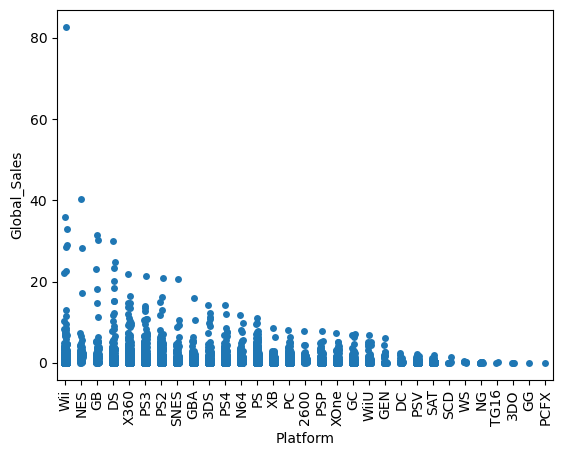

In [13]:
sb.stripplot(x=df.Platform,y=df.Global_Sales)
plt.xticks(rotation=90)
plt.show()

genre=df.groupby('Genre')['Global_Sales'].sum().reset_index()

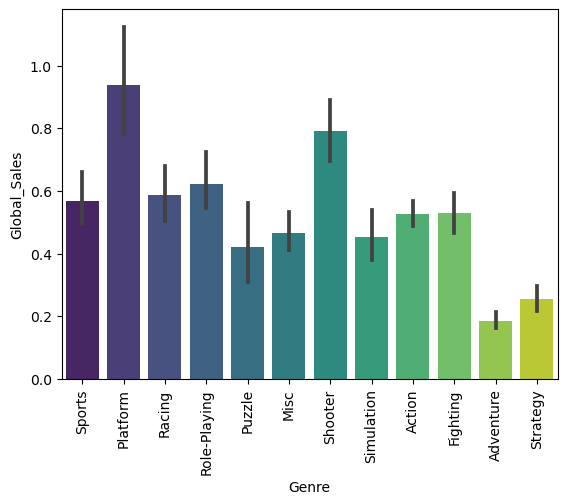

In [31]:
sb.barplot(x=df.Genre,y=df.Global_Sales,palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [34]:
pd.pivot_table(df,index='Genre',columns='Platform',values='Global_Sales',aggfunc='sum',margins=True)


Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne,All
Genre,,,,,,,,,,,,,,,,,,,,,
Action,29.34,NaN,57.02,1.26,115.56,7.92,55.76,37.84,2.74,NaN,...,NaN,10.08,NaN,NaN,118.58,19.35,242.67,49.28,33.79,1751.18
Adventure,1.70,0.06,4.81,2.50,47.29,17.16,14.68,5.93,0.19,NaN,...,NaN,1.50,0.14,NaN,18.43,0.17,15.23,3.06,2.51,239.04
Fighting,1.24,NaN,10.46,1.83,7.20,NaN,4.21,18.43,5.90,NaN,...,NaN,26.95,NaN,NaN,23.86,6.36,37.64,13.55,2.31,448.91
Misc,3.58,NaN,10.48,NaN,137.76,13.35,36.25,16.73,0.03,NaN,...,0.10,5.02,NaN,NaN,221.06,12.23,91.96,9.58,6.86,809.96
Platform,13.27,NaN,32.23,2.54,77.45,54.91,78.30,28.66,15.45,0.04,...,1.50,65.65,NaN,NaN,90.74,21.24,11.39,9.66,0.81,831.37
Puzzle,14.68,0.02,5.57,NaN,84.29,47.47,12.92,4.70,NaN,NaN,...,NaN,6.38,NaN,NaN,15.67,1.33,0.85,0.42,NaN,244.95
Racing,2.91,NaN,14.49,2.65,38.64,4.55,18.80,21.89,0.26,NaN,...,0.07,13.49,NaN,NaN,61.28,7.77,65.99,31.49,8.80,732.04
Role-Playing,NaN,NaN,75.74,0.68,126.85,88.24,64.21,13.15,0.27,NaN,...,0.06,36.43,NaN,1.22,14.06,2.47,71.98,13.51,9.48,927.37
Shooter,26.48,NaN,1.29,0.33,8.20,1.20,3.60,13.63,0.13,NaN,...,NaN,6.07,0.02,NaN,28.77,6.17,278.55,63.55,51.61,1037.37


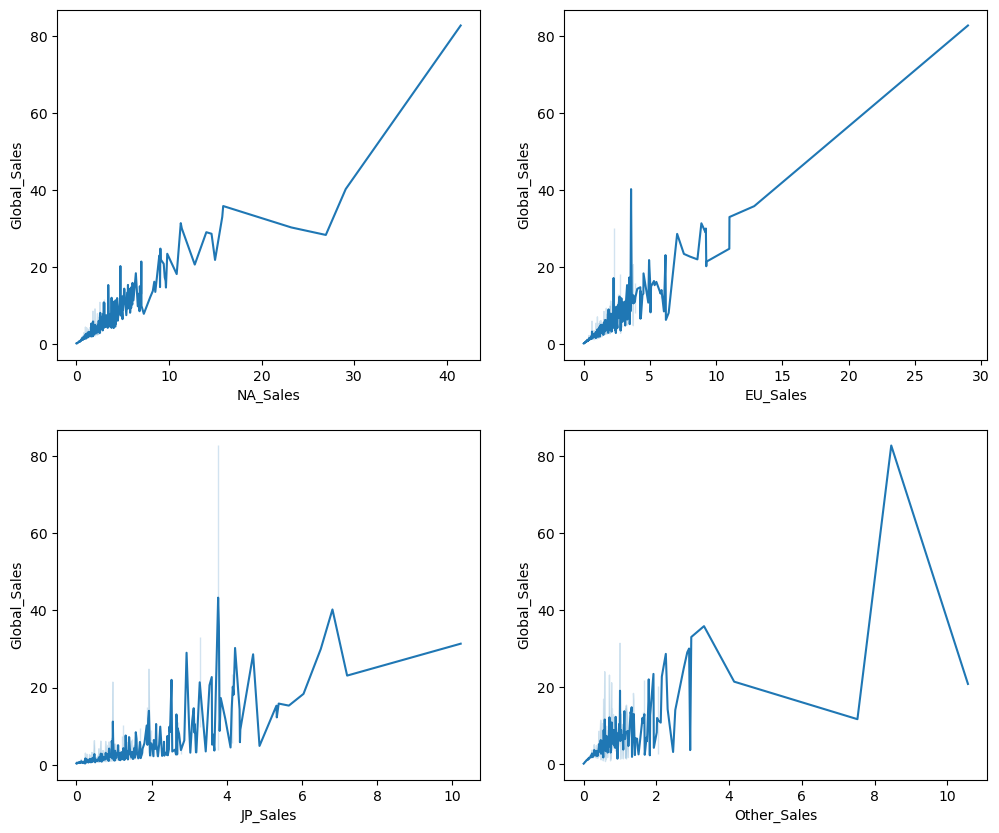

In [9]:
 fig=plt.figure(figsize=[12,10])

ax1=fig.add_subplot(221)
sb.lineplot(x=df.NA_Sales,y=df.Global_Sales)

ax2=fig.add_subplot(222)
sb.lineplot(x=df.EU_Sales,y=df.Global_Sales)

ax3=fig.add_subplot(223)
sb.lineplot(x=df.JP_Sales,y=df.Global_Sales)

ax4=fig.add_subplot(224)
sb.lineplot(x=df.Other_Sales,y= df.Global_Sales)

plt.show()
    

In [18]:
d=df.groupby(['Publisher','Genre'])['Global_Sales'].sum()
tp=d.groupby('Genre').idxmax().apply(lambda x:x[0])



d

In [19]:
tp

Genre
Action          Take-Two Interactive
Adventure                   Nintendo
Fighting                         THQ
Misc                        Nintendo
Platform                    Nintendo
Puzzle                      Nintendo
Racing                      Nintendo
Role-Playing                Nintendo
Shooter                   Activision
Simulation           Electronic Arts
Sports               Electronic Arts
Strategy                    Nintendo
Name: Global_Sales, dtype: object

In [ ]:
c=df.groupby(['Year','Genre'])[['Global_Sales']].sum()
c=c.reset_index()
plt.figure(figsize=(12,5))
sb.pointplot(x=c.Year,y=c.Global_Sales,hue=c.Genre,plalette='ocean')
plt.tittle('Total Global sales Reevenue by Genre over time')
plt.xticks(rotation=90)
plt.legends(tittle='Genre',bbox_to_anchor=(1.05,1))
plt.show()

C:\Users\jai95\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


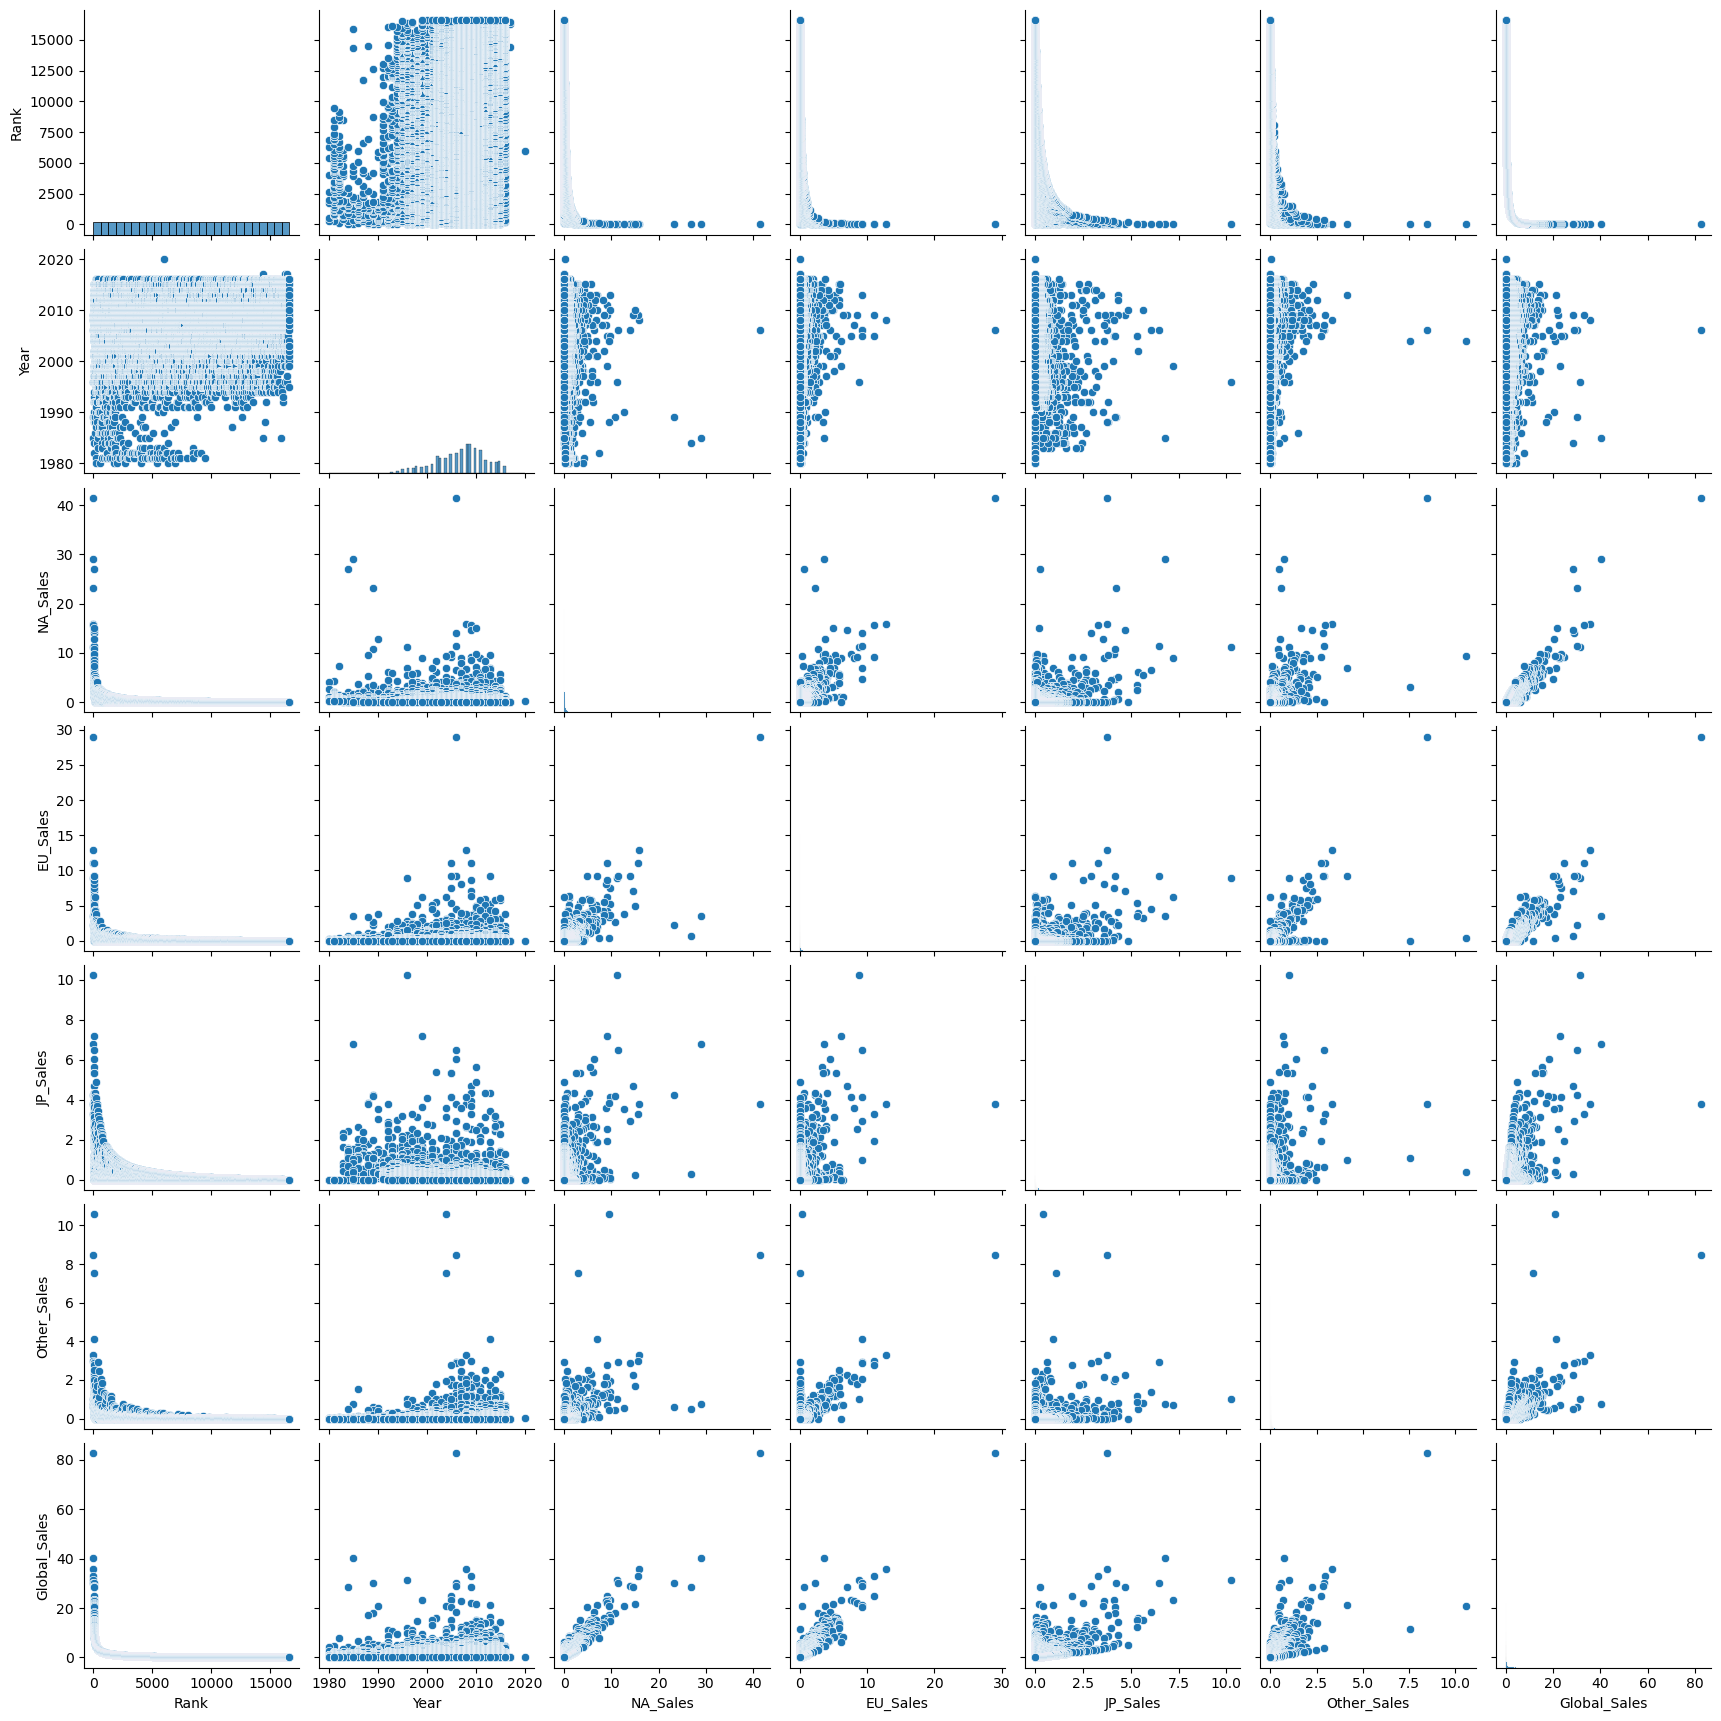

In [23]:
sb.pairplot(df)

In [31]:
print(df.columns.tolist())
nm=input('enter column name')
dt= df.nlargest(10,nm)
dt

['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
enter column nameNA_Sales


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
18,19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61


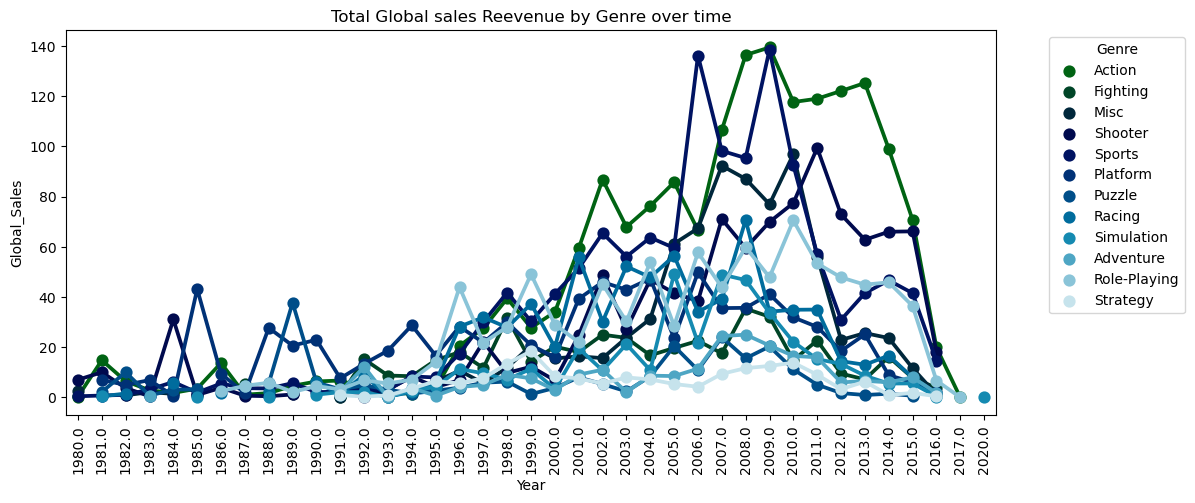

In [41]:
c=df.groupby(['Year','Genre'])[['Global_Sales']].sum()
c=c.reset_index()
plt.figure(figsize=(12,5))
sb.pointplot(x=c.Year,y=c.Global_Sales,hue=c.Genre,palette='ocean')
plt.title('Total Global sales Reevenue by Genre over time')
plt.xticks(rotation=90)
plt.legend(title='Genre',bbox_to_anchor=(1.05,1))
plt.show()